## Notebook d’exploration


## chargement des bibilothèques


In [1]:
# Importation des bibliothèques

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

import statsmodels.formula.api as smf
import statsmodels.api as sm

from scipy.stats import chi2_contingency
from scipy.stats import chi2

## chargement du jeu de données

In [2]:
# Chargement du jeu de données df_food
df_final = pd.read_csv('df_final.csv', sep=',')

In [3]:
# Afficher les 5 premières lignes du jeu de données df_food

df_final.head()

,product_name,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition_grade_fr
0,Mini Confettis,autre_groupe,autre_groupe,1753.0,6.347046,0.8,0.0,99.334971,87.7,0.9,0.6,0.0100,0.003937,14.0,D
1,Praliné Amande Et Noisette,autre_groupe,autre_groupe,2406.0,9.593964,2.9,0.0,63.490342,50.3,3.9,9.5,0.0030,0.001181,14.0,D
2,"Pepsi, Nouveau goût !",Beverages,Sweetened beverages,177.0,0.000000,0.0,0.0,10.400000,10.4,0.0,0.0,0.0254,0.010000,13.0,E
3,Tarte Poireaux Et Lardons,autre_groupe,autre_groupe,1079.0,22.117789,11.0,0.0,16.240603,1.0,1.4,7.5,0.8000,0.314961,15.0,D
4,7Up,Beverages,Sweetened beverages,177.0,0.000000,0.0,0.0,10.400000,10.4,0.1,0.0,0.1000,0.039370,13.0,E


In [4]:
df_final.describe()

,energy_100g,fat_100g,saturated-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
count,58481.000000,58481.000000,58481.000000,58481.000000,58481.000000,58481.000000,58481.000000,58481.000000,58481.000000,58481.000000,58481.000000
mean,1114.863785,13.401723,5.385995,0.005455,27.897212,13.173941,2.143356,7.770775,1.081541,0.426719,8.596159
std,776.402025,15.940560,8.499254,0.047409,25.141618,18.932019,3.986066,7.875131,3.725958,1.502433,9.012736
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.000000
25%,433.000000,2.900000,0.300000,0.000000,8.000000,1.000000,0.000000,1.850000,0.080000,0.031496,1.000000
50%,1033.000000,7.400000,1.960000,0.000000,17.965746,4.000000,1.200000,6.000000,0.570000,0.224409,8.000000
75%,1648.000000,19.700000,7.300000,0.001000,48.200000,17.000000,2.700000,11.000000,1.244600,0.490000,15.000000
max,3765.600000,100.000000,100.000000,10.900000,100.000000,100.000000,100.000000,100.000000,100.000000,83.000000,35.000000


## Analyse Univariée

In [5]:
# variables quantitatives selectionnées
Variables_quantitatives = ['energy_100g',
'fat_100g',
 'saturated-fat_100g',
 'cholesterol_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g',
 'nutrition-score-fr_100g']

In [6]:
# variables nutritionnelles
variables_nutritionnelles = ['fat_100g',
 'saturated-fat_100g',
 'cholesterol_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g']

/Users/azizi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


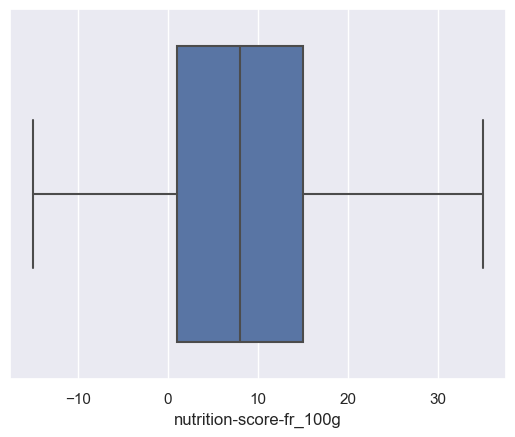

In [7]:
sns.set_theme()
sns.boxplot(df_final['nutrition-score-fr_100g'])
plt.show()

In [47]:
df_final['nutrition-score-fr_100g'].describe()

count    58481.000000
mean         8.596159
std          9.012736
min        -15.000000
25%          1.000000
50%          8.000000
75%         15.000000
max         35.000000
Name: nutrition-score-fr_100g, dtype: float64

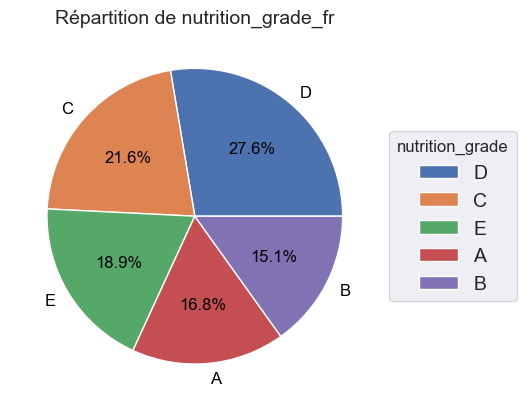

In [8]:
# visualisation de la  pie chart (diagramme circulaire) de la variable 'nutrition-score-fr_100g'

plt.title('Répartition de nutrition_grade_fr', size=14)
wedges, texts, autotexts = plt.pie(df_final['nutrition_grade_fr'].value_counts().values, 
        labels = df_final['nutrition_grade_fr'].value_counts().index.str.upper(),
                                   autopct='%1.1f%%', textprops={'fontsize': 12, 
                                     'color' : 'Black'}
       )
ax = plt.gca()
sns.set_theme()
ax.legend(wedges, df_final['nutrition_grade_fr'].value_counts().index.str.upper(),
          title='nutrition_grade',
          loc="center left",
          fontsize=14,
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

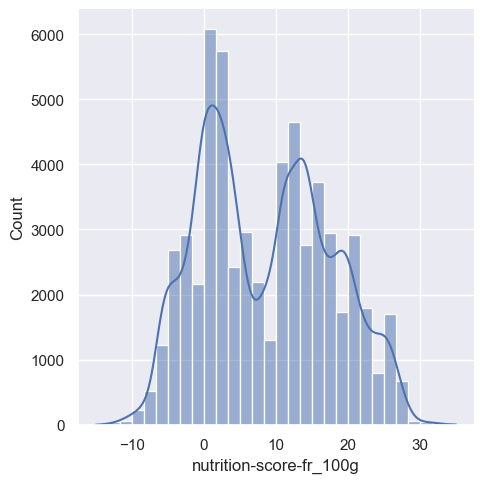

In [9]:
sns.set_theme()
sns.displot(data=df_final,
            x='nutrition-score-fr_100g',
            kde=True,height=5,
            bins=30);
plt.show()

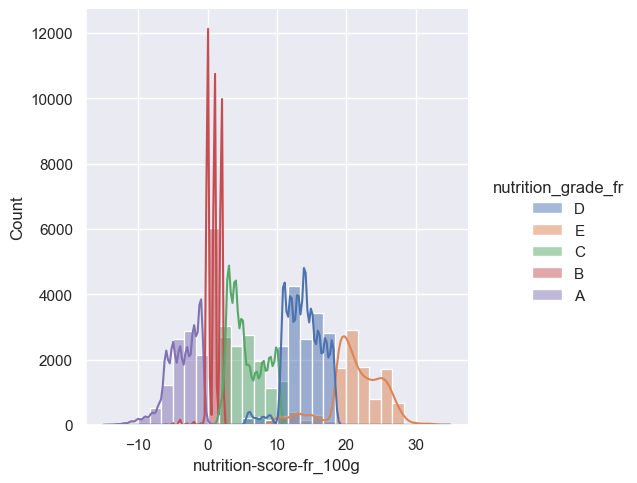

In [10]:
sns.set_theme()
sns.displot(data=df_final,
            x='nutrition-score-fr_100g',
            hue='nutrition_grade_fr',
            kde=True,height=5,
            bins=30);
plt.show()      
    


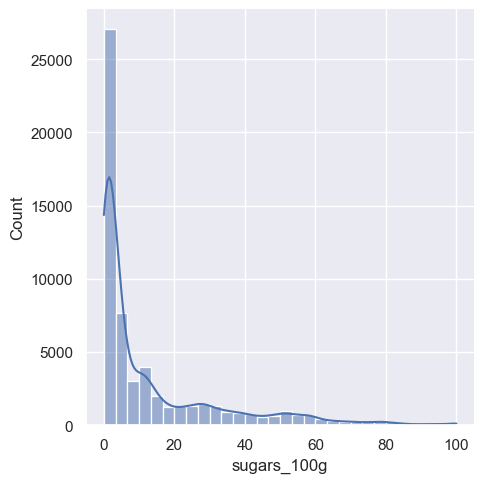

In [11]:
sns.set_theme()
sns.displot(data=df_final,
            x='sugars_100g',
            kde=True,height=5,
            bins=30);
plt.show()

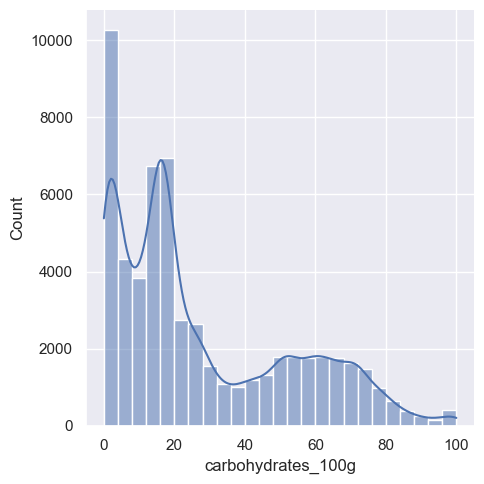

In [12]:
sns.set_theme()
sns.displot(data=df_final,
            x='carbohydrates_100g',
            kde=True,height=5,
            bins=25);
plt.show()

/Users/azizi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/azizi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/azizi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar fle

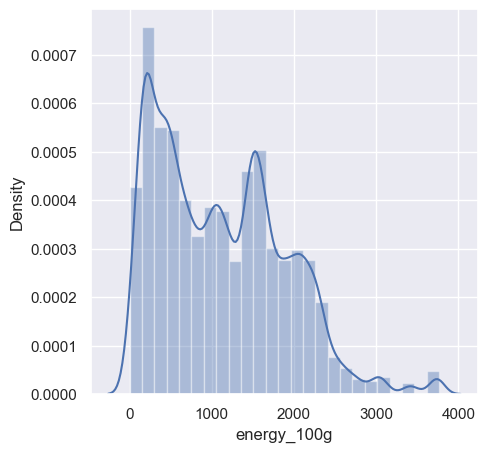

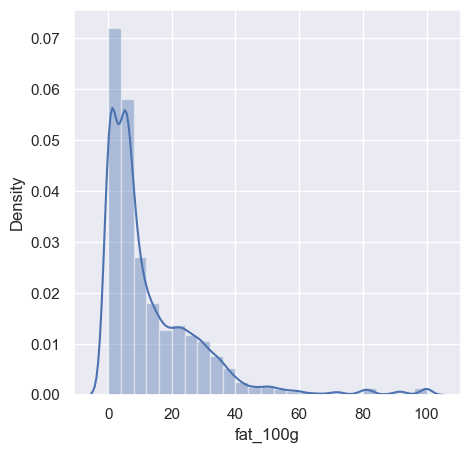

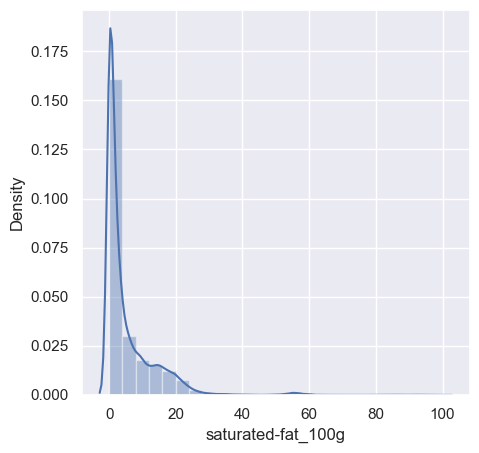

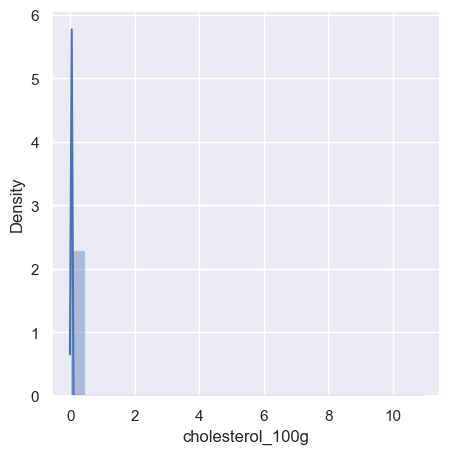

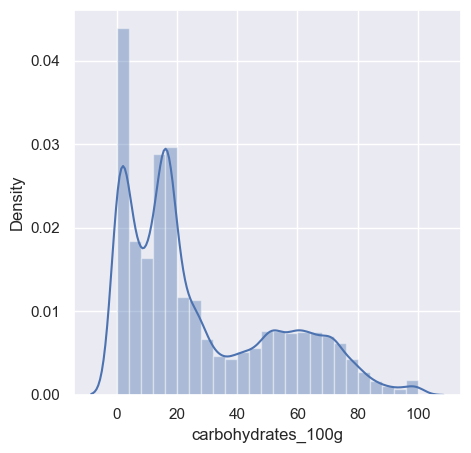

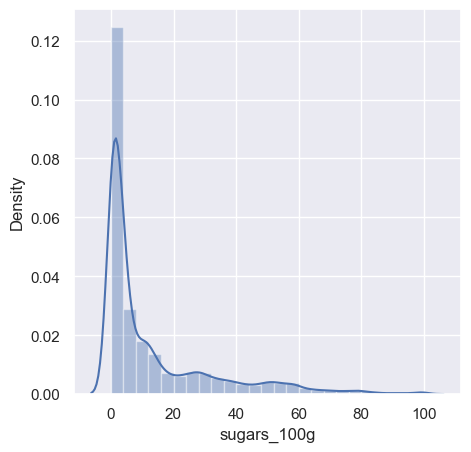

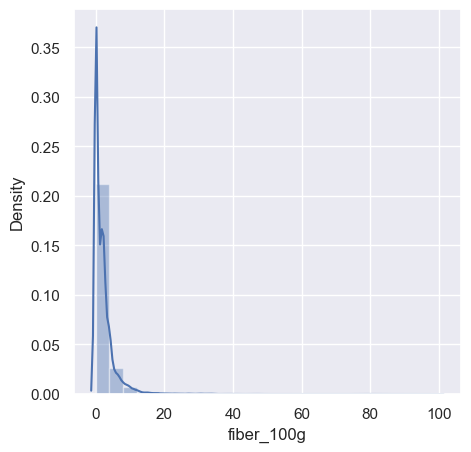

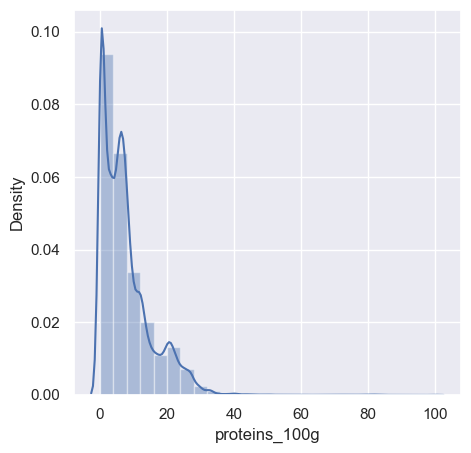

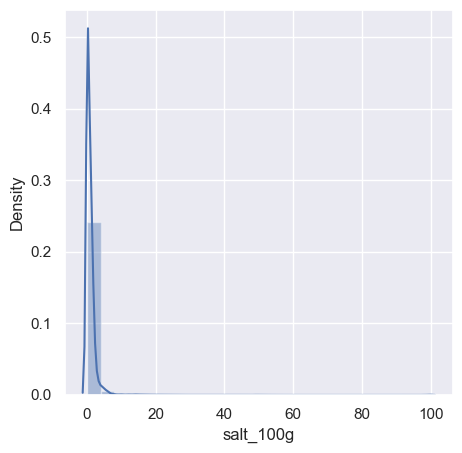

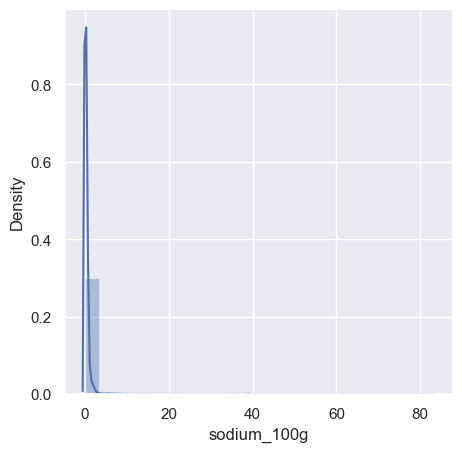

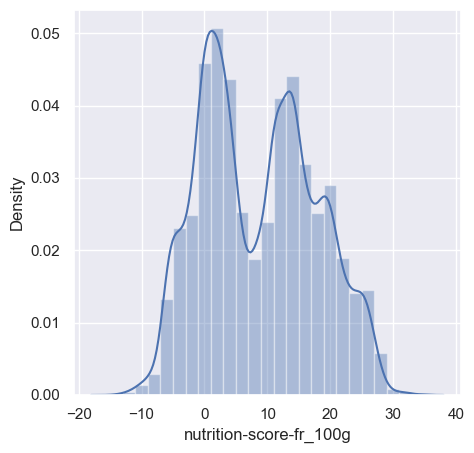

In [13]:
for variable in Variables_quantitatives:
    plt.figure(figsize = (5,5))
    sns.distplot(df_final[variable],
            kde=True,
            bins=25)

## Analyse bivariée

### quantitative - quantitative
### Test 'pearson'

In [14]:
# Calcul du coefficient de corrélation linéaire (Pearson) entre les deux variables fat_100g et nutrition-score-fr_100g
fat = df_final['fat_100g']
nutri = df_final['nutrition-score-fr_100g']

print("Le coefficient de corrélation de Pearson entre les deux variables fat_100g et nutrition-score-fr_100g est: r = {}".format(fat.corr(nutri, method='pearson')))


Le coefficient de corrélation de Pearson entre les deux variables fat_100g et nutrition-score-fr_100g est: r = 0.5792922481055287


In [15]:
# Calcul du coefficient de corrélation linéaire (Pearson) entre les deux variables 'carbohydrates_100g' et nutrition-score-fr_100g
carbohydrates = df_final['carbohydrates_100g']
nutri = df_final['nutrition-score-fr_100g']

print("Le coefficient de corrélation de Pearson entre les deux variables 'carbohydrates_100g' et nutrition-score-fr_100g est: r = {}".format(carbohydrates.corr(nutri, method='pearson')))


Le coefficient de corrélation de Pearson entre les deux variables 'carbohydrates_100g' et nutrition-score-fr_100g est: r = 0.2791467546203689


In [16]:
# Calcul du coefficient de corrélation linéaire (Pearson)entre les deux variables 'salt_100g' et nutrition-score-fr_100g
salt = df_final['salt_100g']
nutri = df_final['nutrition-score-fr_100g']

print("Le coefficient de corrélation de Pearson entre les deux variables 'salt_100g' et nutrition-score-fr_100g est: r = {}".format(salt.corr(nutri, method='pearson')))


Le coefficient de corrélation de Pearson entre les deux variables 'salt_100g' et nutrition-score-fr_100g est: r = 0.12230711916952307


In [17]:
# Calcul du coefficient de corrélation linéaire (Pearson) entre les deux variables 'sugars_100g' et 'carbohydrates_100g'
sugars = df_final['sugars_100g']
carbohydrates = df_final['carbohydrates_100g']

print("Le coefficient de corrélation de Pearson entre les deux variables 'sugars_100g' et 'carbohydrates_100g' est: r = {}".format(sugars.corr(carbohydrates, method='pearson')))


Le coefficient de corrélation de Pearson entre les deux variables 'sugars_100g' et 'carbohydrates_100g' est: r = 0.7197696017967719


In [18]:
# Calcul du coefficient de corrélation linéaire (Pearson) entre les deux variables 'salt_100g' et 'sodium_100g'
sel = df_final['salt_100g']
sodium = df_final['sodium_100g']

print("Le coefficient de corrélation de Pearson entre les deux variables 'salt_100g' et 'sodium_100g' est: r = {}".format(sodium.corr(sel, method='pearson')))


Le coefficient de corrélation de Pearson entre les deux variables 'salt_100g' et 'sodium_100g' est: r = 0.9925259056222598


On remarque une corrélation remarquable entre les variables fat_100g et nutrition-score-fr_100g, salt et sodium, sugar et carbohydrates

In [19]:
# définir la correlations entre les variables
def correlation(df_final):
    mask = np.triu(np.ones_like(df_final.corr(), dtype=bool))
    sns.heatmap(df_final.corr(), mask=mask, center=0, cmap="coolwarm",
               linewidths=1, annot=True, fmt=".2f", vmin=-1, vmax=1)
    plt.title('Correlations entre les variables', fontsize=15, fontweight='bold')
    sns.set_theme()
    plt.show()
    

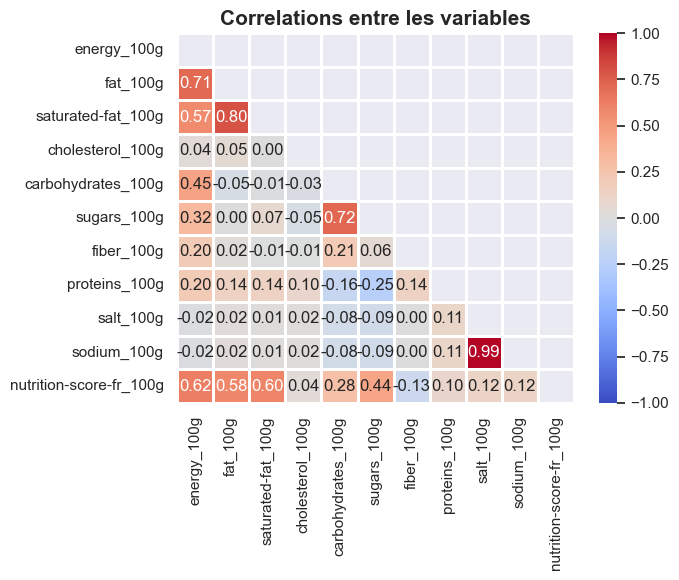

In [20]:
# afficher la correlations entre les variables
correlation(df_final)

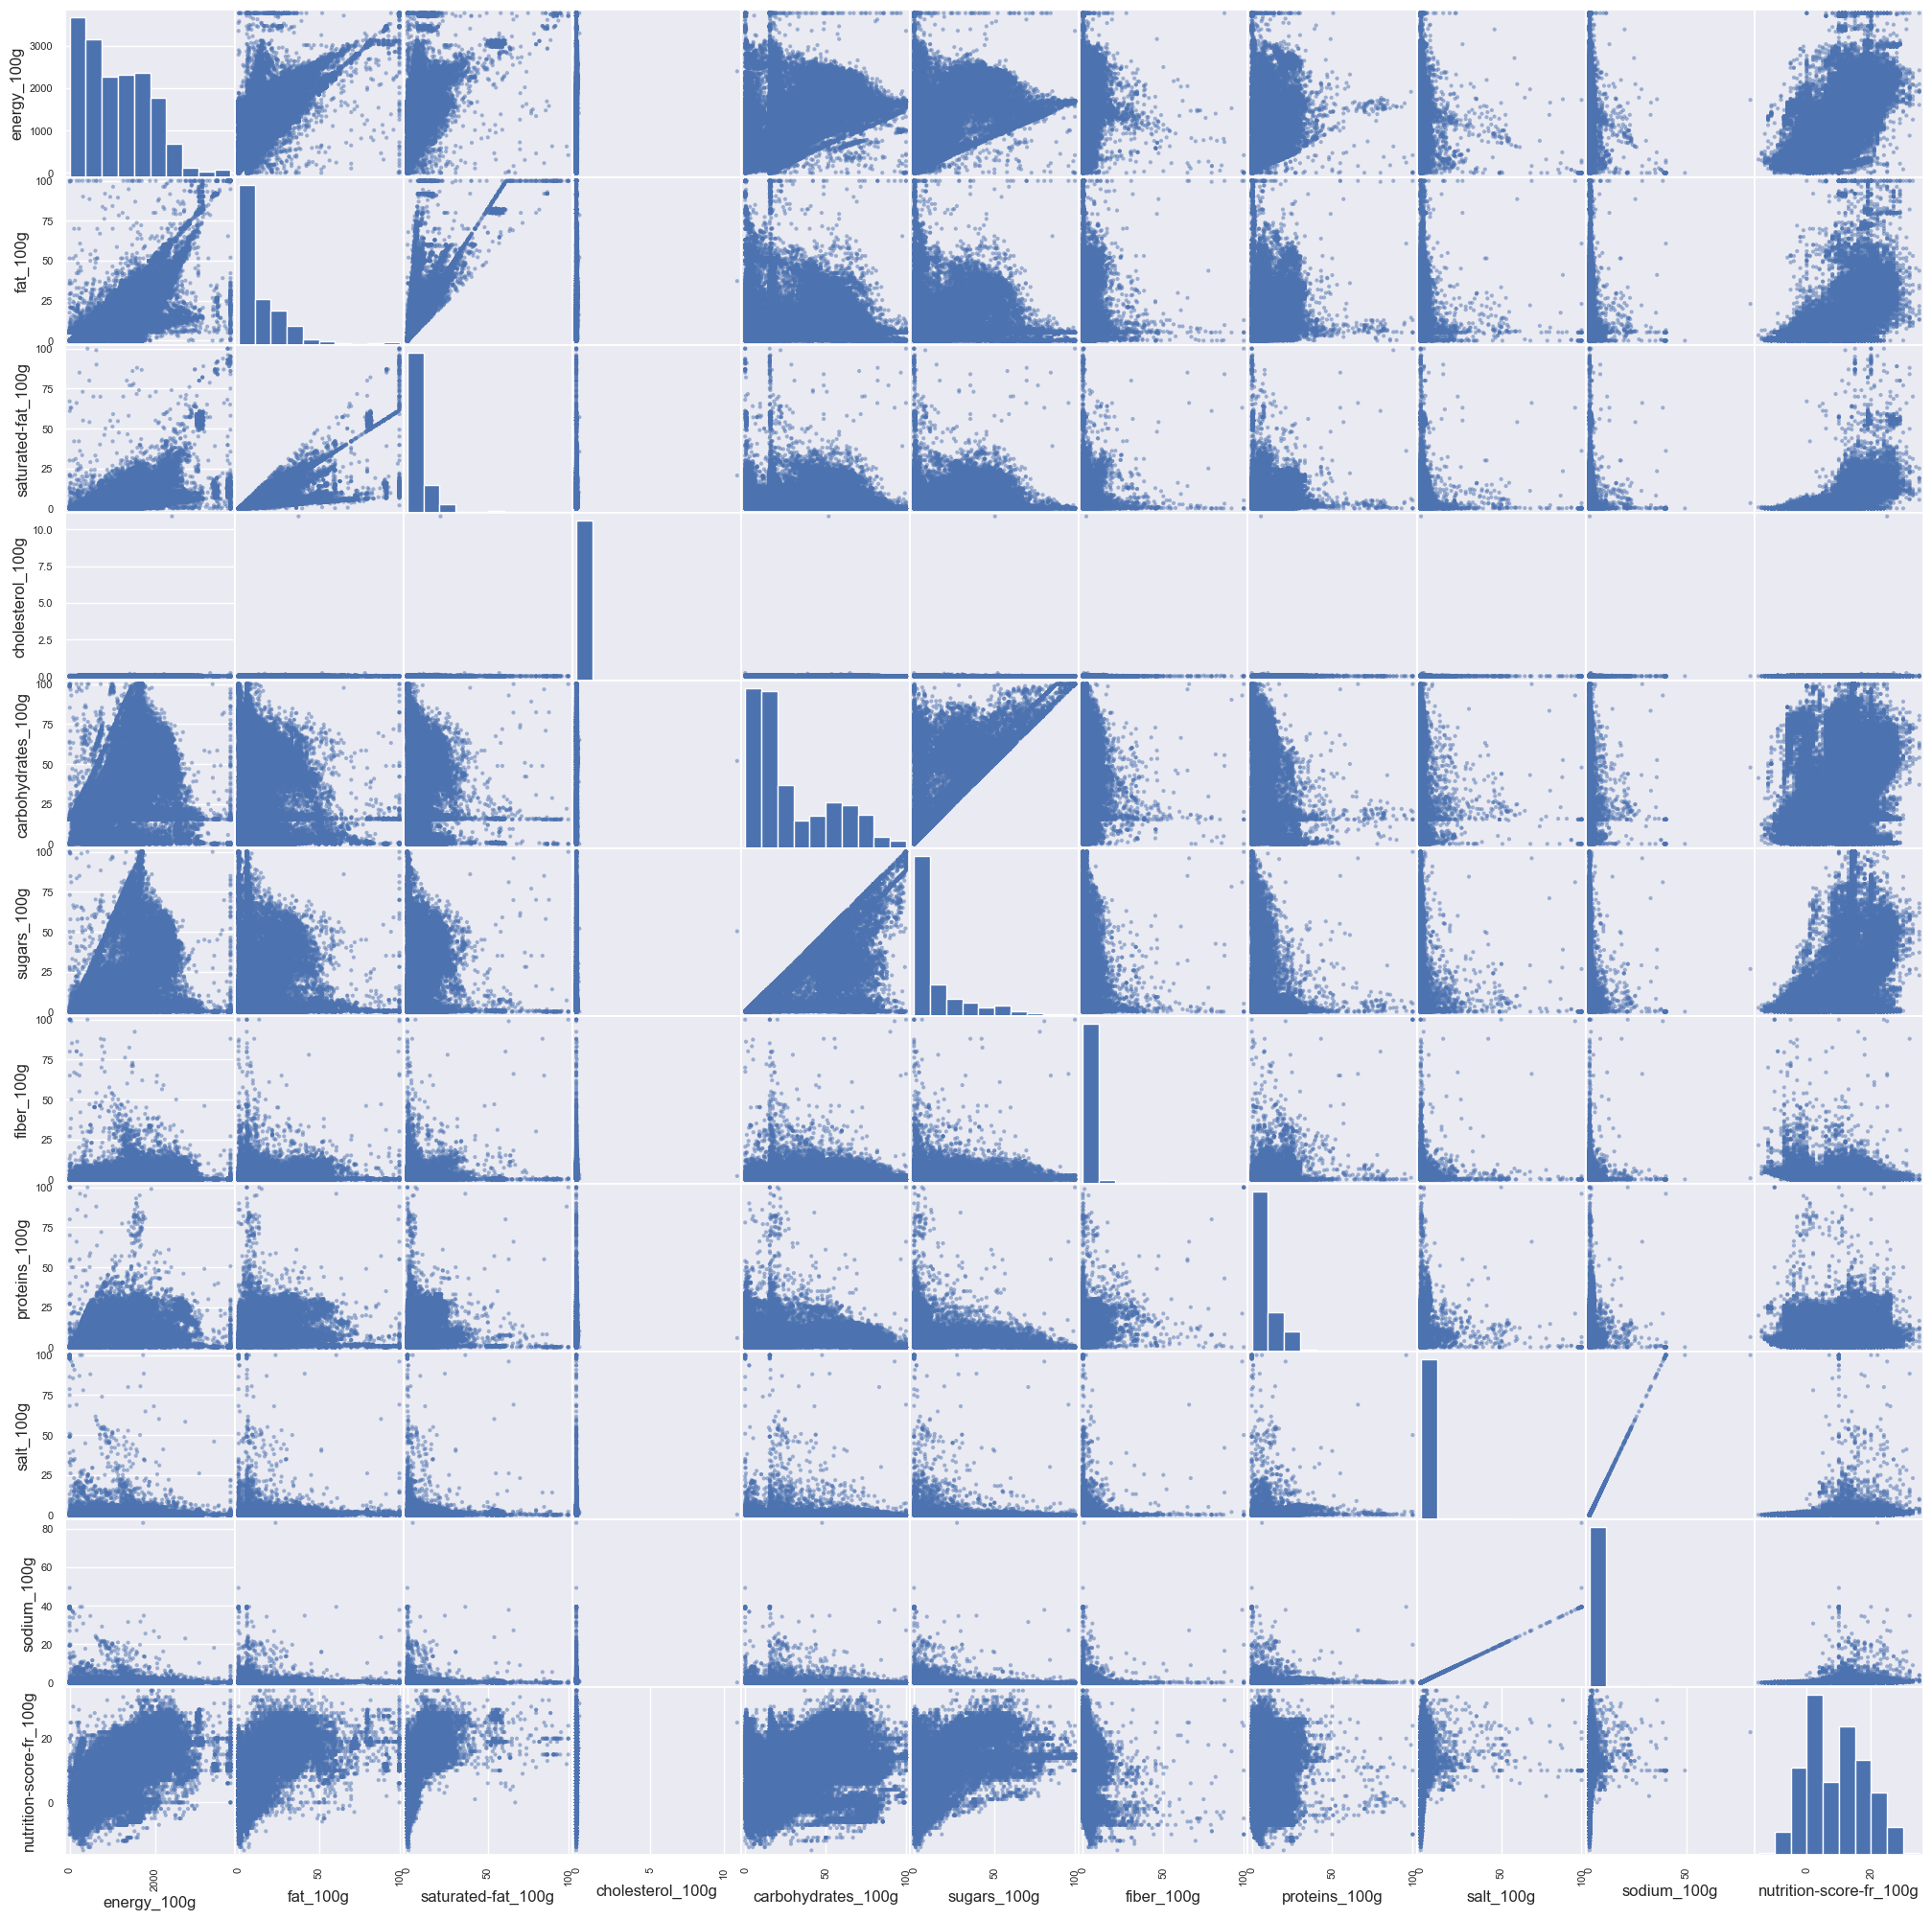

In [21]:
# visualisation de la scatter_matrix des variables
from pandas.plotting import scatter_matrix
scatter_matrix(df_final[Variables_quantitatives],figsize=(25,25));
sns.set_theme()
plt.show()

### quantitative - qualitative

### Analyse de la variance : Anova
##### Test la relation entre la variable qualitative nutri_grade et la variable quantitatives nutriscore

On va tester la relation entre la variable qualitative pnns_groups_1 et la variable quantitatives nutriscore

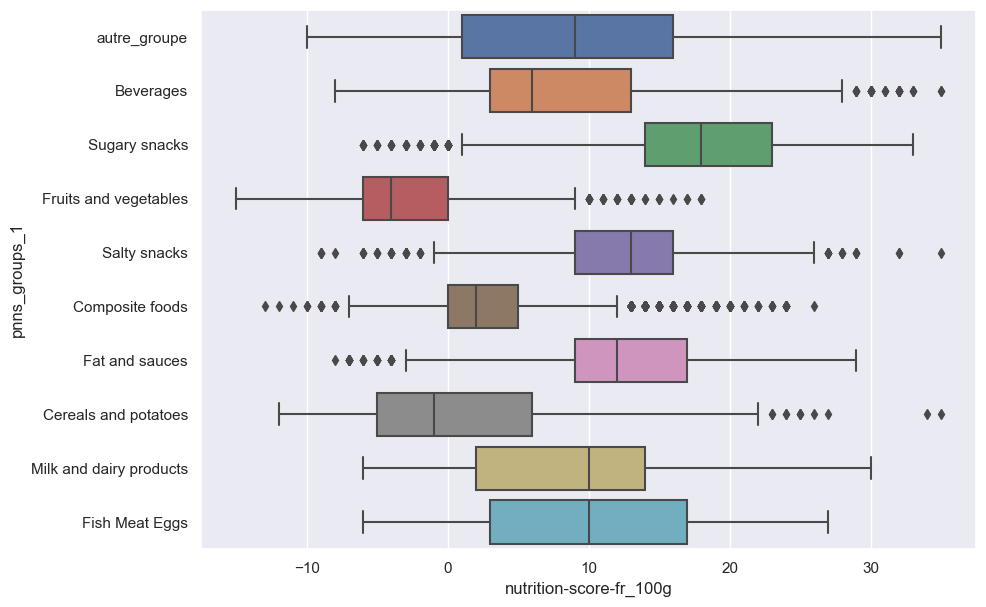

In [63]:
# boxplot de la variable 'nutrition_grade_fr' (variable qualitative) enfonction de la variable 'nutrition-score-fr_100g'(variable quantitative).

plt.subplots(figsize=(10,7))
ax = sns.boxplot(x='nutrition-score-fr_100g', y='pnns_groups_1', 
                 meanprops={'marker':'s', 'markeredgecolor':'black'}, data=df_final)
sns.set_theme()
plt.show()

On peut constater à partir de ces boxplot que les fruits, les légumes, les féculents et les poissons présentent un bon nutri_score et une alimentation saine et équilibrée pour les personnes diabétiques (sujet de l'application) contrairement au produits sucrés, salés et gras. 

In [64]:
# définir les deux variables 
# l'hypothèse nulle (symbole international : H{0})
nutrition_score_fr_100g = df_final['nutrition-score-fr_100g']
nutrition_grade_fr = df_final['pnns_groups_1']
anova = smf.ols('nutrition_score_fr_100g~pnns_groups_1', data=df_final).fit()
print(anova.summary())
sm.stats.anova_lm(anova, typ=2)

                               OLS Regression Results                              
Dep. Variable:     nutrition_score_fr_100g   R-squared:                       0.302
Model:                                 OLS   Adj. R-squared:                  0.302
Method:                      Least Squares   F-statistic:                     2808.
Date:                     Sat, 04 Feb 2023   Prob (F-statistic):               0.00
Time:                             01:50:59   Log-Likelihood:            -2.0106e+05
No. Observations:                    58481   AIC:                         4.021e+05
Df Residuals:                        58471   BIC:                         4.022e+05
Df Model:                                9                                         
Covariance Type:                 nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

,sum_sq,df,F,PR(>F)
pnns_groups_1,1.433379e+06,9.0,2807.531691,0.0
Residual,3.316916e+06,58471.0,NaN,NaN


#### La p-valeur 

La valeur de p est la probabilité qui mesure le degré de certitude avec lequel il est possible d'invalider l'hypothèse nulle. Une valeur de p inférieure permet d'invalider l'hypothèse nulle avec plus de certitude.

Pour déterminer si le coefficient de corrélation est statistiquement significatif, comparez la valeur de p au seuil de signification. En général, un seuil de signification (noté alpha ou α) de 0,05 fonctionne bien. Un seuil de signification de 0,05 indique un risque de 5 % de conclure à tort qu'une différence existe.
Valeur de p ≤ α : la corrélation est statistiquement significative (Rejeter $H_{0}$)
Si la valeur de p est inférieure ou égale au seuil de signification, vous rejetez l'hypothèse nulle. Vous pouvez en conclure que la corrélation est statistiquement significative.

Valeur de p > α : la corrélation n'est pas statistiquement significative (Impossible de rejeter $H_{0}$)
Si la valeur de p est supérieure au seuil de signification, vous ne pouvez pas rejeter l'hypothèse nulle. Vous n'êtes pas en mesure de conclure que la corrélation est statistiquement significative.(https://support.minitab.com/fr-fr/minitab/21/help-and-how-to/statistics/basic-statistics/how-to/correlation/interpret-the-results/all-statistics-and-graphs/)

La p-valeur de ce test = 0 inférieure à 5 %. On rejette donc l'hypothèse $H_{0}$.

La corrélation est statistiquement significative


### qualitative - qualitative
### Analyse des deux variables qualitatives 'nutrition_grade_fr' et  'pnns_groups_1' avec le Chi-2


In [65]:
# afficher le tableau de contingence
X = 'nutrition_grade_fr'
Y = 'pnns_groups_1'

contingence = df_final[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
contingence = contingence.fillna(0)
contingence

pnns_groups_1,Beverages,Cereals and potatoes,Composite foods,Fat and sauces,Fish Meat Eggs,Fruits and vegetables,Milk and dairy products,Salty snacks,Sugary snacks,autre_groupe,Total
nutrition_grade_fr,,,,,,,,,,,
A,135.0,2406.0,1143.0,71.0,426.0,2185.0,357.0,40.0,48.0,2989.0,9800
B,518.0,768.0,1558.0,175.0,577.0,539.0,894.0,54.0,251.0,3504.0,8838
C,1215.0,950.0,1355.0,683.0,1280.0,295.0,1273.0,464.0,650.0,4455.0,12620
D,656.0,567.0,792.0,1187.0,1340.0,28.0,2146.0,869.0,2774.0,5803.0,16162
E,1619.0,63.0,64.0,574.0,910.0,0.0,200.0,284.0,3424.0,3923.0,11061
Total,4143.0,4754.0,4912.0,2690.0,4533.0,3047.0,4870.0,1711.0,7147.0,20674.0,58481


In [66]:
from scipy.stats import chi2_contingency as chi2_contingency
khi2, pval , ddl , contingence_chi2 = chi2_contingency(contingence)
print(pval)

0.0


On va considérer qu'il existe un lien entre ces deux variables qualitatives si la p-value est inférieur à 0,05. 
La p-valeur de ce test = 0 inférieure à 5 %. On rejette donc l'hypothèse  $H_{0}$.

Ce test Chi-2 montre bien qu'il existe un lien entre les deux variables qualitatives 'nutrition_grade_fr' et 'pnns_groups_1'.

### Analyse multivariée

### Analyse en composantes principales ACP


Dans cette partie de l'analyse en composantes principales on va s'inspirer des cours d'OpenClassrooms https://openclassrooms.com/fr/courses/4525281-realisez-une-analyse-exploratoire-de-donnees/5345201-tp-realisez-une-acp:

In [67]:
# Matrice des données
X = df_final[Variables_quantitatives].values
X[:5]

array([[1.75300000e+03, 6.34704645e+00, 8.00000000e-01, 0.00000000e+00,
        9.93349710e+01, 8.77000000e+01, 9.00000000e-01, 6.00000000e-01,
        1.00000000e-02, 3.93700787e-03, 1.40000000e+01],
       [2.40600000e+03, 9.59396399e+00, 2.90000000e+00, 0.00000000e+00,
        6.34903419e+01, 5.03000000e+01, 3.90000000e+00, 9.50000000e+00,
        3.00000000e-03, 1.18110236e-03, 1.40000000e+01],
       [1.77000000e+02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.04000000e+01, 1.04000000e+01, 0.00000000e+00, 0.00000000e+00,
        2.54000000e-02, 1.00000000e-02, 1.30000000e+01],
       [1.07900000e+03, 2.21177888e+01, 1.10000000e+01, 0.00000000e+00,
        1.62406034e+01, 1.00000000e+00, 1.40000000e+00, 7.50000000e+00,
        8.00000000e-01, 3.14960630e-01, 1.50000000e+01],
       [1.77000000e+02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.04000000e+01, 1.04000000e+01, 1.00000000e-01, 0.00000000e+00,
        1.00000000e-01, 3.93700787e-02, 1.30000000e+

In [68]:
# Commençons par scaler les données. On instancie :
scaler = StandardScaler()
# fit et transforme:
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled[:5]

# On espère avoir une moyenne à 0 et un écart type à 1 :
idx = ["mean", "std"]
pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]
# Nous allons travailler que sur les 6 premières composantes :
n_components = 6
# On instancie notre ACP :
pca = PCA(n_components=n_components)
# On l'entraine sur les données scalées : 
pca.fit(X_scaled)
# On l'entraine sur les données scalées :
pca.fit(X_scaled)
# Intéressons nous maintenant à la variance captée par chaque nouvelle composante. 
# Grace à scikit-learn  on peut utiliser l'attribut explained_variance_ratio_ :
pca.explained_variance_ratio_
# Enregistrons cela dans une variable : 
scree = (pca.explained_variance_ratio_*100).round(2)
scree
# somme cumulée numpy avec la fonction cumsum :
scree_cum = scree.cumsum().round()
scree_cum
# Définisons ensuite une variable avec la liste de nos composantes : 
x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3, 4, 5, 6]

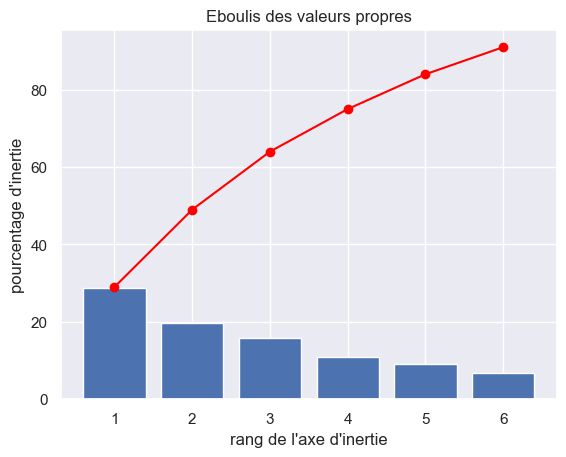

In [69]:
# afficher de façon graphique :
sns.set_theme()
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

On a en bleu la variance de chaque nouvelle composante, et en rouge la variance cumulée.
On voit ici le premier plan factoriel représente aproximativement 50 % de l’inertie totale. 

In [90]:
# formule de ce calcul variable avec l'attribut components_ 
# définir la variable pcs :
pcs = pca.components_
pcs

array([[ 0.49763906,  0.45495847,  0.44194106,  0.02321452,  0.23012709,
         0.24947508,  0.0548172 ,  0.08631998,  0.02794698,  0.02788382,
         0.47149383],
       [-0.04526645,  0.14939994,  0.12702344,  0.07217072, -0.35991039,
        -0.35769077, -0.05836379,  0.25745535,  0.55988197,  0.55866164,
         0.03935266],
       [-0.01353681, -0.2943699 , -0.26836005, -0.07587504,  0.46463574,
         0.44599532,  0.10592415, -0.22402401,  0.42008817,  0.42172428,
         0.06970413],
       [ 0.18538038, -0.06989328, -0.12576015,  0.18476543,  0.15889572,
        -0.09652717,  0.76156609,  0.49549267, -0.02666769, -0.0274204 ,
        -0.22197045],
       [-0.02704194, -0.0822783 , -0.10612316,  0.94141451,  0.05881653,
         0.09564483, -0.2589486 ,  0.0621466 , -0.0205323 , -0.02091065,
         0.10292176],
       [-0.00657409,  0.25170384,  0.17208065,  0.25610525, -0.11619123,
        -0.12508767,  0.4360616 , -0.75715227,  0.05591044,  0.05794651,
        -0.205

In [71]:
#  Afficher les variable dans un dataframe :
pcs = pd.DataFrame(pcs)
pcs

,0,1,2,3,4,5,6,7,8,9,10
0,0.497639,0.454958,0.441941,0.023215,0.230127,0.249475,0.054817,0.086320,0.027947,0.027884,0.471494
1,-0.045266,0.149400,0.127023,0.072171,-0.359910,-0.357691,-0.058364,0.257455,0.559882,0.558662,0.039353
2,-0.013537,-0.294370,-0.268360,-0.075875,0.464636,0.445995,0.105924,-0.224024,0.420088,0.421724,0.069704
3,0.185380,-0.069893,-0.125760,0.184765,0.158896,-0.096527,0.761566,0.495493,-0.026668,-0.027420,-0.221970
4,-0.027042,-0.082278,-0.106123,0.941415,0.058817,0.095645,-0.258949,0.062147,-0.020532,-0.020911,0.102922
5,-0.006574,0.251704,0.172081,0.256105,-0.116191,-0.125088,0.436062,-0.757152,0.055910,0.057947,-0.205767


<AxesSubplot:>

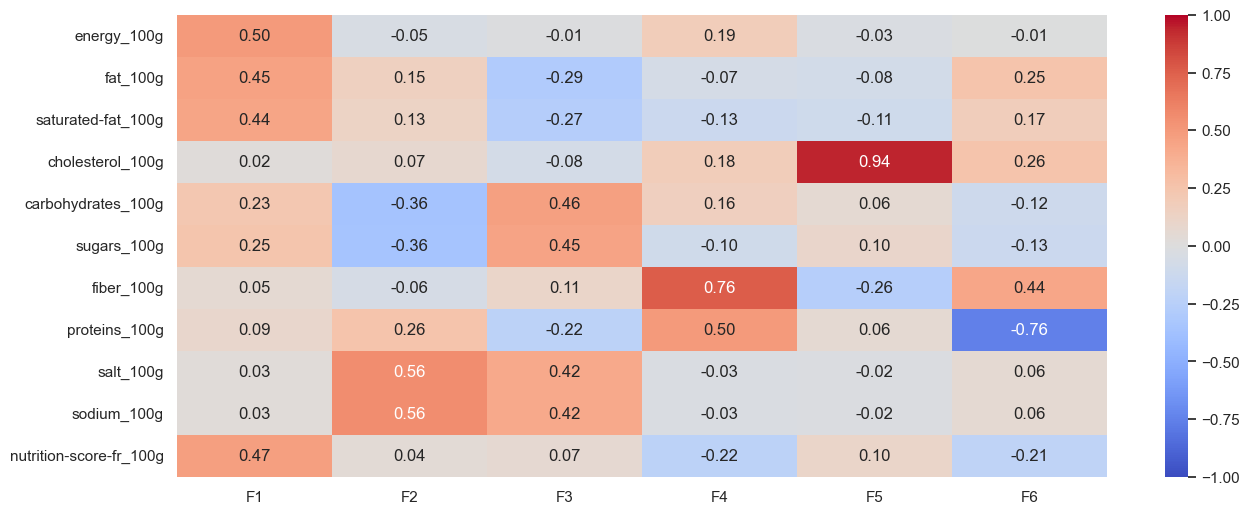

In [87]:
# définir les variables
pcs.columns = Variables_quantitatives
pcs.index = [f"F{i}" for i in x_list]
# arrondir les résultats pour simplifier l'analyse 
pcs.round(2)
# afficher de façon graphique 
sns.set_theme()
fig, ax = plt.subplots(figsize=(15, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

On peut constater des corrélations entre les composantes et les variables; la première composante principale présente l’energy, les lipides et le nutriscore, la deuxième les sels, la troisième les glucides, la 4eme les fibres, la 5ème le cholesterol et la 6ème est inversement corrélée avec la variable protéine .  

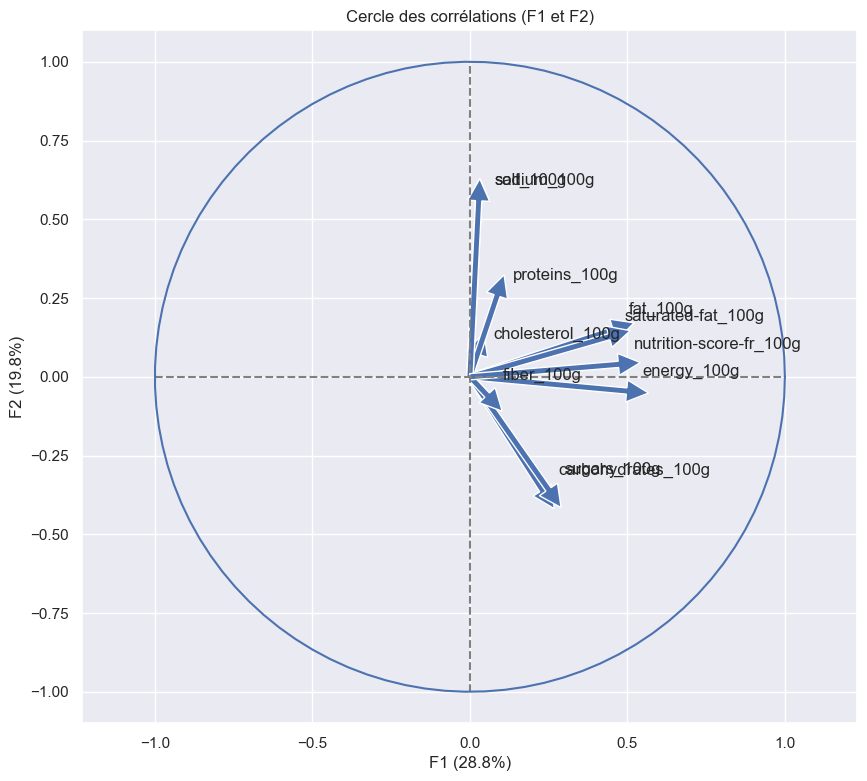

In [89]:
# Définir les axes x et y. Nous allons utiliser les 2 premières composantes
x, y = 0,1
sns.set_theme()
fig, ax = plt.subplots(figsize=(10, 9))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width=0.07,
             head_length=0.07, 
             width=0.02,              )

    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             Variables_quantitatives[i])
    
# affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')


# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
plt.show(block=False)

In [74]:
# dfinir une fonction pour afficher le graphe des correlations
sns.set_theme()
def correlation_graph(pca, 
                      x_y, 
                      Variables_quantitatives): 
    """Affiche le graphe des correlations"""
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                Variables_quantitatives[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    # J'ai copié collé le code sans le lire
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

In [75]:
# Appliquer la fonction sur F1 et F2 
# préciser 0 et 1 pour F1 et F2
x_y = (0,1)
x_y

(0, 1)

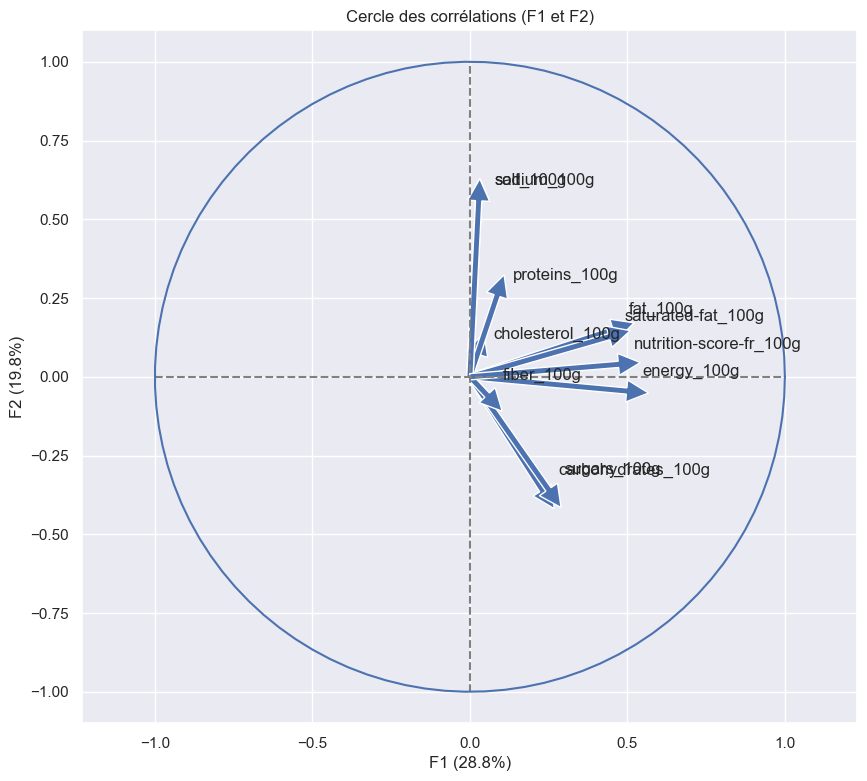

In [76]:
# Appliquer la fonction sur F1 et F2 
sns.set_theme()
correlation_graph(pca, x_y, Variables_quantitatives)

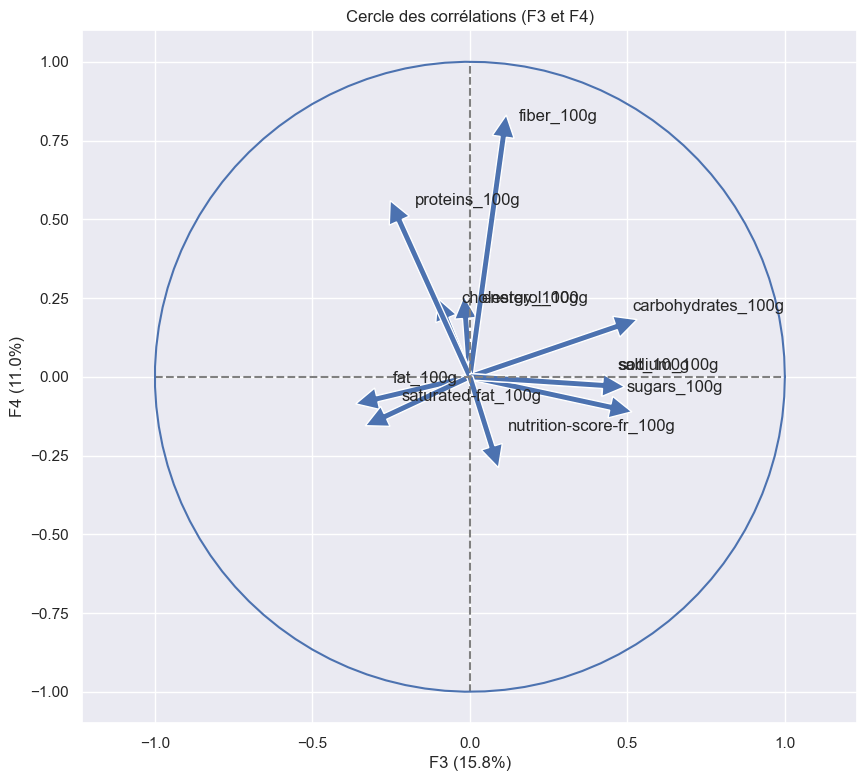

In [77]:
# Appliquer la fonction sur F3 et F4 
correlation_graph(pca, (2,3), Variables_quantitatives)

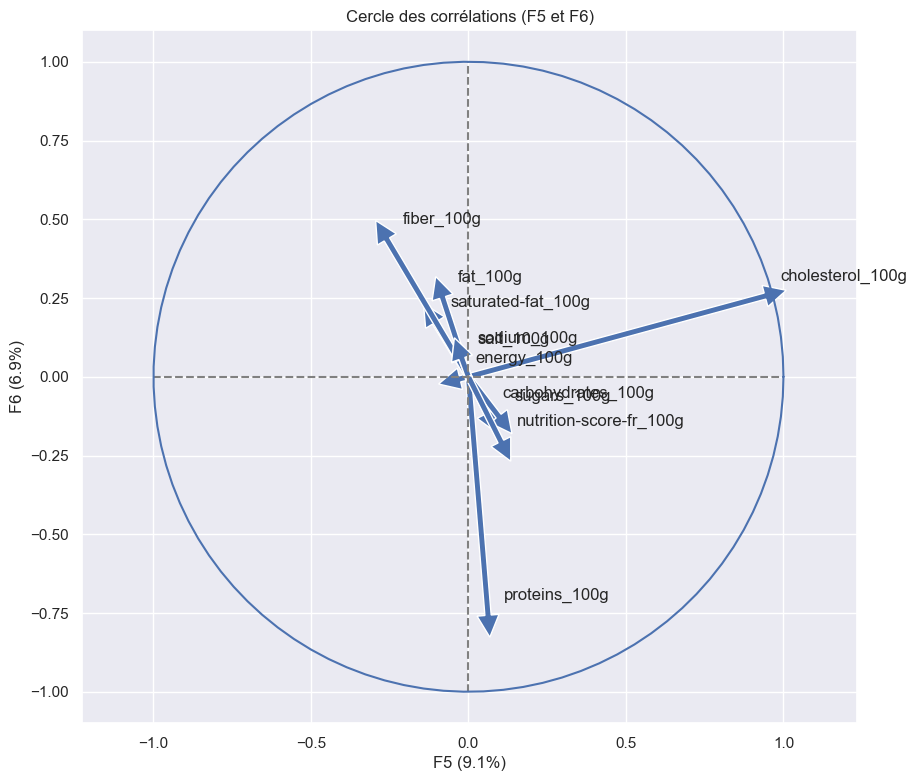

In [78]:
# Appliquer la fonction sur F5 et F6 
correlation_graph(pca, (4,5), Variables_quantitatives)

### Projection

In [79]:
# calcul les coordonnées dans le nouvel espace 
X_proj = pca.transform(X_scaled)
X_proj[:5]

array([[ 1.7736159 , -3.1217505 ,  3.32185171, -0.50502857,  0.60445172,
        -0.66402149],
       [ 1.71180132, -1.63329356,  1.46566939,  0.70298518,  0.14134409,
        -0.69070945],
       [-1.36300191, -0.37392476,  0.01602996, -1.19491008,  0.14565662,
         0.13718447],
       [ 0.56554462,  0.50239108, -0.85671874, -0.47543272, -0.18853481,
         0.14641148],
       [-1.36052204, -0.35325808,  0.03534238, -1.17687418,  0.13834035,
         0.15037642]])

In [80]:
x_y

(0, 1)

In [93]:
# dfinir une fonction pour afficher la projection pnns_groups_1
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points f clusters is No
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha, 
    # c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        # j'ai copié collé la fonction sans la lire
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center') 

    # Titre et display
    plt.title(f"Projection (sur F{x+1} et F{y+1})")
    sns.set_theme()
    plt.show()

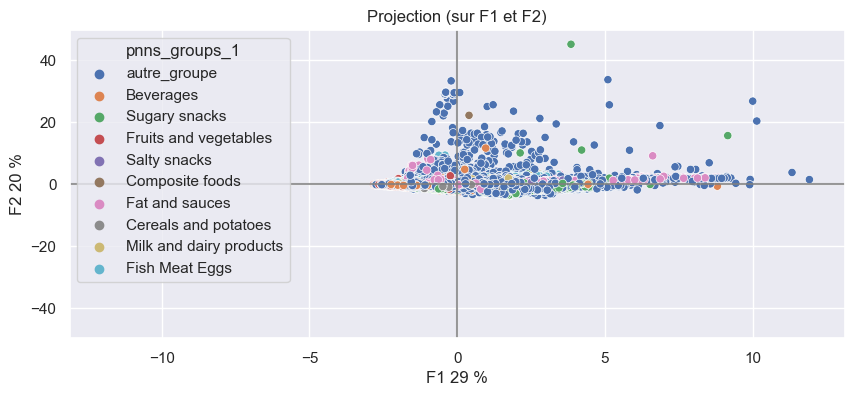

In [94]:
# Appliquer la fonction sur F1 et F2 
x_y = [0,1]
display_factorial_planes(X_proj, x_y, pca, figsize=(10,4), clusters=df_final['pnns_groups_1'], marker="o")

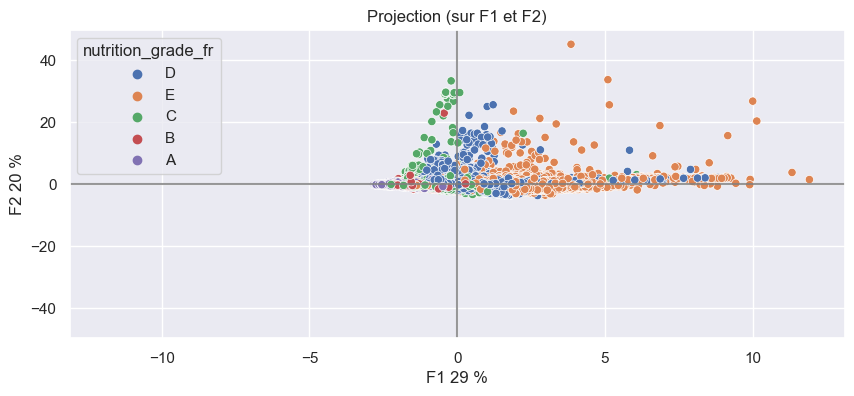

In [95]:
# Appliquer la fonction sur F1 et F2 
x_y = [0,1]
display_factorial_planes(X_proj, x_y, pca, figsize=(10,4), clusters=df_final['nutrition_grade_fr'], marker="o")

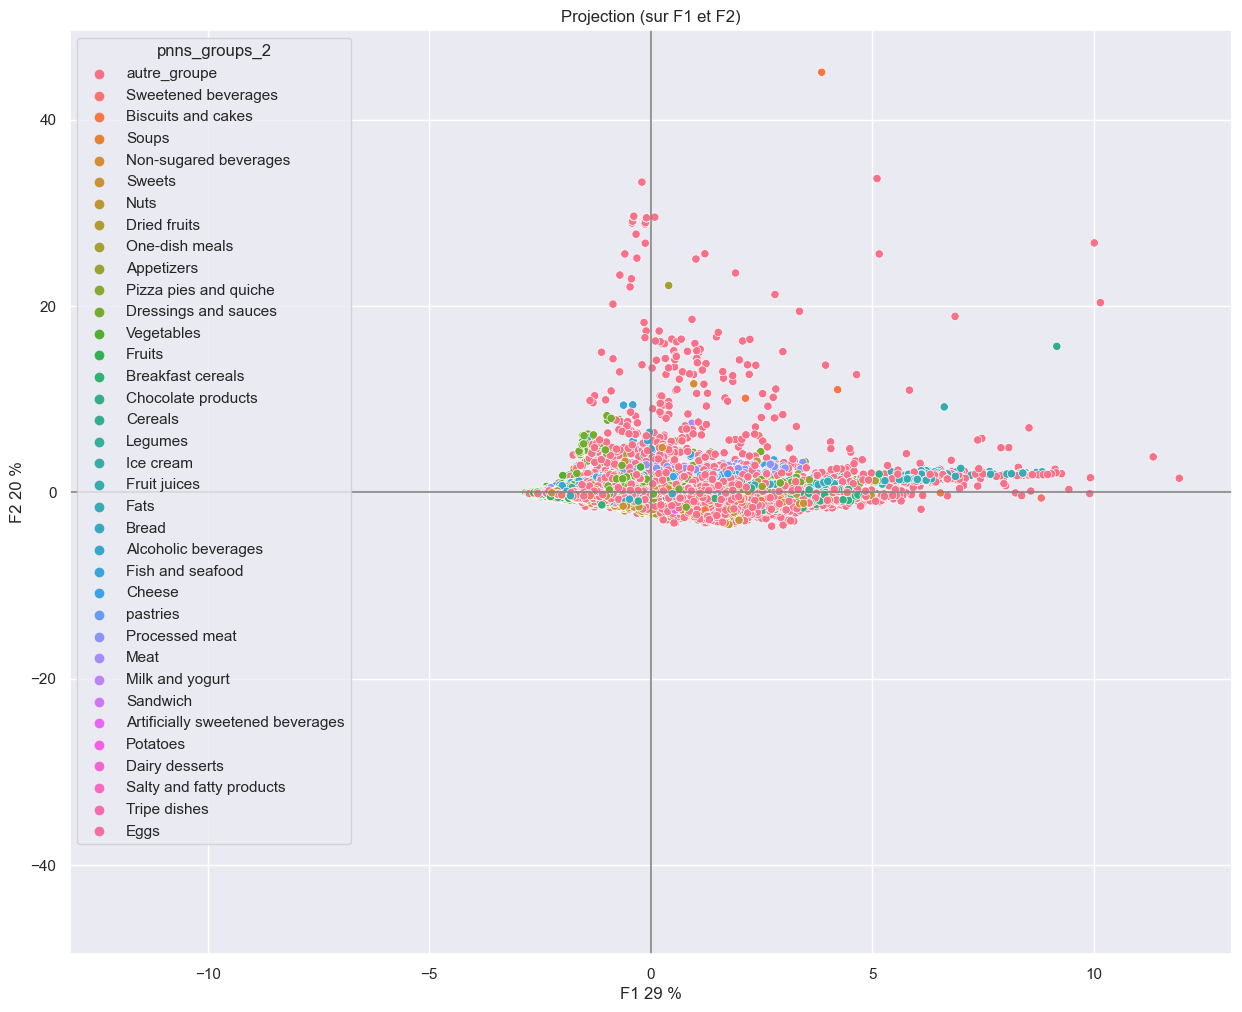

In [96]:
# Appliquer la fonction sur F1 et F2 
x_y = [0,1]
display_factorial_planes(X_proj, x_y, pca, figsize=(15,12), clusters=df_final['pnns_groups_2'], marker="o")

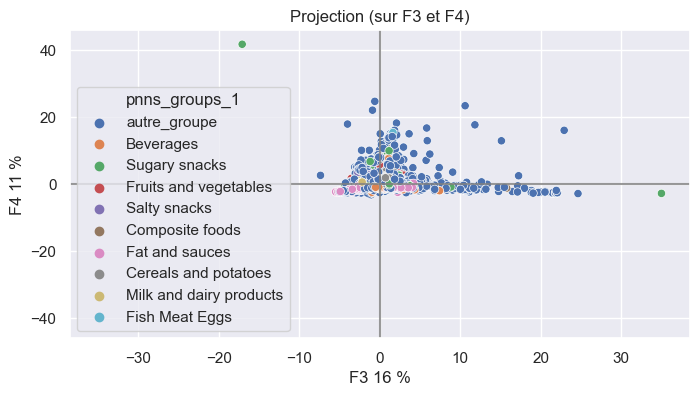

In [97]:
# Appliquer la fonction sur F2 et F3 
x_y = [2,3]
display_factorial_planes(X_proj, x_y, pca, figsize=(8,4), clusters=df_final['pnns_groups_1'], marker="o")

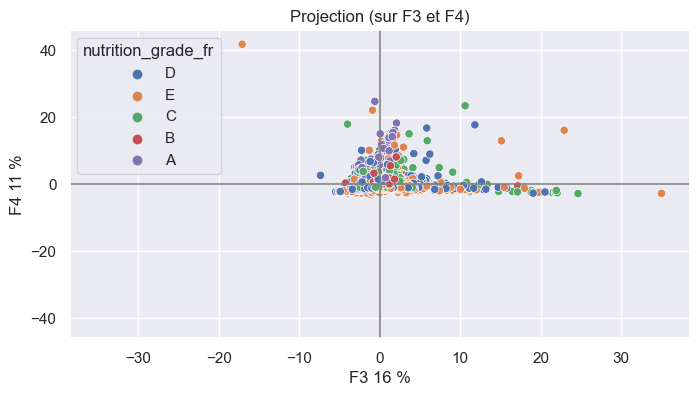

In [98]:
# Appliquer la fonction sur F2 et F3 
x_y = [2,3]
display_factorial_planes(X_proj, x_y, pca, figsize=(8,4), clusters=df_final['nutrition_grade_fr'], marker="o")

### Conclusion 

Le jeu de données de 'Open Food Facts' présente plusieurs informations pertinentes pour la faisabilité  de l’application.

Le dataset confirme que pour avoir une alimentation saine et équilibrée pour les personnes diabétiques: il faut:
* Privilégier les fruits, légumes, féculents, poissons… 
* Limiter la consommation de produits sucrés, salés et gras

"C’est une alimentation :
bénéfique pour la santé ; elle est variée, sans aliment interdit. Elle consiste à privilégier les fruits, légumes, féculents, poissons… et à limiter la consommation de produits sucrés, salés et gras ; qui couvre vos besoins, en quantité adaptée à chacun pour apporter l’énergie nécessaire au fonctionnement de l’organisme. Il est donc nécessaire de faire attention à la taille des portions. Trop importantes, elles favorisent le surpoids, tout comme une alimentation trop riche en graisses. Aussi, une alimentation régulière est essentielle. Ne pas sauter de repas permet d’éviter les variations glycémiques qui favorisent le grignotage, mais aussi de contrôler le poids.
Connaître la composition des aliments est important. Les aliments sont constitués principalement de 3 grandes familles de nutriments (éléments nutritifs apportés par l’alimentation). Il s’agit :
des glucides (sucres et féculents) ; des lipides (graisses) ; des protéines (notamment présentes dans la viande, le poisson, les produits laitiers, etc.) D’autres nutriments sont essentiels pour couvrir les apports journaliers recommandés et sont apportés par une alimentation variée : vitamines, sels minéraux, oligo-éléments."(https://www.ameli.fr/assure/sante/themes/diabete/diabete-vivre-quotidien/equilibre-alimentaire/diabete-alimentation-fondamentaux#text_11726)

L’application de conseil recommande les fruits, les légumes, les féculents, les poissons… 
Et conseille de limiter la consommation de produits sucrés, salés et gras
Elle regroupe la liste des produits conseillés 
Il suffit de scanner un code-barre du produit pour vérifier s’il est dans la liste des produits recommandés ou pas.